In [263]:
import pandas as pd

# index를 HHID로 사용 -> HHID(가구 데이터이므로 HHID에 중복없음)
a_hh_df = pd.read_csv("Data/a_hh.csv", index_col=0)
b_hh_df = pd.read_csv("Data/b_hh.csv", index_col=0)
c_hh_df = pd.read_csv("Data/c_hh.csv", index_col=0)

# a, b, c 각각의 info 확인해보기
- 확인결과 가구 데이터로 HHID 중복이 없어서 index를 HHID로 사용

## a.info()

In [264]:
a_hh_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6748 entries, 112001011.0 to 400009011.0
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H_WGC          6748 non-null   float64
 1   H_WSC          6748 non-null   float64
 2   DATE_Y         6689 non-null   float64
 3   DATE_M         6689 non-null   float64
 4   DATE_D         6689 non-null   float64
 5   REGION1        6689 non-null   float64
 6   REGION2        6689 non-null   float64
 7   FAM_N          6689 non-null   float64
 8   IND_N          6689 non-null   float64
 9   DEATH_YN       6689 non-null   float64
 10  ALL_CON        6689 non-null   float64
 11  GENERTN        6689 non-null   float64
 12  MARR_IMMI_YN   6689 non-null   float64
 13  CUSTM_BENF_YN  6689 non-null   float64
 14  CUSTM_BENF1_D  467 non-null    float64
 15  CUSTM_BENF2_D  467 non-null    float64
 16  CUSTM_BENF3_D  467 non-null    float64
 17  CUSTM_BENF4_D  467 non-null    float64
 

## b.info()

In [265]:
b_hh_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6217 entries, 112001011.0 to 400009011.0
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H_WGC          6217 non-null   float64
 1   H_WSC          6217 non-null   float64
 2   DATE_Y         6190 non-null   float64
 3   DATE_M         6190 non-null   float64
 4   DATE_D         6190 non-null   float64
 5   REGION1        6190 non-null   float64
 6   REGION2        6190 non-null   float64
 7   FAM_N          6190 non-null   float64
 8   IND_N          6190 non-null   float64
 9   DEATH_YN       6190 non-null   float64
 10  ALL_CON        6190 non-null   float64
 11  GENERTN        6190 non-null   float64
 12  MARR_IMMI_YN   6190 non-null   float64
 13  CUSTM_BENF_YN  6190 non-null   float64
 14  CUSTM_BENF1_D  473 non-null    float64
 15  CUSTM_BENF2_D  473 non-null    float64
 16  CUSTM_BENF3_D  473 non-null    float64
 17  CUSTM_BENF4_D  473 non-null    float64
 

## c.info()

In [266]:
c_hh_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5907 entries, 112001011.0 to 400009011.0
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H_WGC          5907 non-null   float64
 1   H_WSC          5907 non-null   float64
 2   DATE_Y         5878 non-null   float64
 3   DATE_M         5878 non-null   float64
 4   DATE_D         5878 non-null   float64
 5   REGION1        5878 non-null   float64
 6   REGION2        5878 non-null   float64
 7   FAM_N          5878 non-null   float64
 8   IND_N          5878 non-null   float64
 9   DEATH_YN       5878 non-null   float64
 10  ALL_CON        5878 non-null   float64
 11  GENERTN        5878 non-null   float64
 12  MARR_IMMI_YN   5878 non-null   float64
 13  CUSTM_BENF_YN  5878 non-null   float64
 14  CUSTM_BENF1_D  463 non-null    float64
 15  CUSTM_BENF2_D  463 non-null    float64
 16  CUSTM_BENF3_D  463 non-null    float64
 17  CUSTM_BENF4_D  463 non-null    float64
 

# 겹치는 가구 수 확인해보기

In [267]:
# a, b, c -> 세 데이터 프레임에서 겹치는 인덱스 확인
common_index = a_hh_df.index.intersection(b_hh_df.index).intersection(c_hh_df.index)
common_index.value_counts().sum()

5784

# 필요없는 컬럼 제거 및 모든 컬럼값이 결측인 행 제거하기
필요없는 컬럼 제거
- 'H_WGC', 'H_WSC' : 가중치 필요 없음
- 'HEXP2_1', 'HEXP2_2', ... 'HEXP2_6' : 인원수도 적고 굳이 나눌 필요 없을 것 같다고 생각이 들어 제거

In [268]:
a_hh_df = a_hh_df.drop(columns=['H_WGC', 'H_WSC', 'HEXP2_1', 'HEXP2_2', 'HEXP2_3', 'HEXP2_4', 'HEXP2_5', 'HEXP2_6'])

In [269]:
b_hh_df = b_hh_df.drop(columns=['H_WGC', 'H_WSC', 'HEXP2_1', 'HEXP2_2', 'HEXP2_3', 'HEXP2_4', 'HEXP2_5', 'HEXP2_6'])

In [270]:
c_hh_df = c_hh_df.drop(columns=['H_WGC', 'H_WSC', 'HEXP2_1', 'HEXP2_2', 'HEXP2_3', 'HEXP2_4', 'HEXP2_5', 'HEXP2_6'])

행의 모든 컬럼값이 NaN값인 행 제거

In [271]:
a_hh_df = a_hh_df.dropna(how="all")

In [272]:
b_hh_df = b_hh_df.dropna(how="all")

In [273]:
c_hh_df = c_hh_df.dropna(how="all")

In [274]:
#a_hh_df.info()
#b_hh_df.info()
c_hh_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 112001011.0 to 400009011.0
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_Y         5878 non-null   float64
 1   DATE_M         5878 non-null   float64
 2   DATE_D         5878 non-null   float64
 3   REGION1        5878 non-null   float64
 4   REGION2        5878 non-null   float64
 5   FAM_N          5878 non-null   float64
 6   IND_N          5878 non-null   float64
 7   DEATH_YN       5878 non-null   float64
 8   ALL_CON        5878 non-null   float64
 9   GENERTN        5878 non-null   float64
 10  MARR_IMMI_YN   5878 non-null   float64
 11  CUSTM_BENF_YN  5878 non-null   float64
 12  CUSTM_BENF1_D  463 non-null    float64
 13  CUSTM_BENF2_D  463 non-null    float64
 14  CUSTM_BENF3_D  463 non-null    float64
 15  CUSTM_BENF4_D  463 non-null    float64
 16  HOUSE_TY       5878 non-null   float64
 17  HOUSE_FLR      5878 non-null   float64
 

# H_INC에 대한 결측치 처리하기

## a_hh_df

### H_INC1~3, H_INC7, H_INC_TOT, H_INC_MON 결측치 처리
결측치 개수 확인 -> 결측치의 수가 많지 않으므로 그냥 평균으로 처리
- H_INC1 : `73개`
- H_INC2 : `11개`
- H_INC3 : `0개`
- H_INC7 : `3개`
- H_INC_TOT, H_INC_MON : `93개` (H_INC_TOT를 12로 나눈 값이 H_INC_MON)
- H_INC4, H_INC5, H_INC6 -> -9.0의 결측치 말고 자체 NaN결측치가 많아 나중에 따로 처리

In [275]:
print(len(a_hh_df.loc[a_hh_df['H_INC1'] == -9.0]))
print(len(a_hh_df.loc[a_hh_df['H_INC2'] == -9.0]))
print(len(a_hh_df.loc[a_hh_df['H_INC3'] == -9.0]))
print(len(a_hh_df.loc[a_hh_df['H_INC7'] == -9.0]))
print(len(a_hh_df.loc[a_hh_df['H_INC_TOT'] == -9.0]))
print(len(a_hh_df.loc[a_hh_df['H_INC_MON'] == -9.0]))

73
11
0
3
93
93


결측값 -9.0을 평균으로 대체하기
- 결측값 -9.0을 0으로 바꾼 후에 평균을 구해야 평균이 제대로 나오게 되는데 0으로 바꾸면 원래 0이었던 값과 결측이 처리된 값을 구분할 수 없기 때문에 처음에 0으로 바꿔서 평균을 구한 다음 이후에 처음부터 코드를 한번 더 돌려서 평균 구하는 부분은 주석처리하고 진행
    - -9.0을 0으로 바꾼 후 평균을 구한다
    - 평균 구하는 부분을 주석처리 후 처음부터 코드 다시 돌린다
    - 원래 결측값 -9.0을 평균으로 대체한다

평균값 결과 -> 소수점 셋째짜리에서 반올림
- a_hh_df['H_INC1'].mean() : 18.00792345642099
- a_hh_df['H_INC2'].mean() : 118.11272238002691
- a_hh_df['H_INC3'].mean() : 1.5950067274629989
- a_hh_df['H_INC7'].mean() : 207.51592166243086
- a_hh_df['H_INC_TOT'].mean() : 3748.258783076693
- a_hh_df['H_INC_MON'].mean() : 312.3548985897244

In [276]:
a_1_mean = 18.01
a_2_mean = 118.11
a_3_mean = 1.60
a_7_mean = 207.52
a_tot_mean = 3748.26
a_mon_mean = 312.35

In [277]:
a_hh_df['H_INC1'] = a_hh_df['H_INC1'].replace(-9.0, a_1_mean)
a_hh_df['H_INC2'] = a_hh_df['H_INC2'].replace(-9.0, a_2_mean)
a_hh_df['H_INC3'] = a_hh_df['H_INC3'].replace(-9.0, a_3_mean)
a_hh_df['H_INC7'] = a_hh_df['H_INC7'].replace(-9.0, a_7_mean)
a_hh_df['H_INC_TOT'] = a_hh_df['H_INC_TOT'].replace(-9.0, a_tot_mean)
a_hh_df['H_INC_MON'] = a_hh_df['H_INC_MON'].replace(-9.0, a_mon_mean)

In [278]:
# 다 결측치 없어졌는 확인하기
print(len(a_hh_df.loc[a_hh_df['H_INC1'] == -9.0]))
print(len(a_hh_df.loc[a_hh_df['H_INC2'] == -9.0]))
print(len(a_hh_df.loc[a_hh_df['H_INC3'] == -9.0]))
print(len(a_hh_df.loc[a_hh_df['H_INC7'] == -9.0]))
print(len(a_hh_df.loc[a_hh_df['H_INC_TOT'] == -9.0]))
print(len(a_hh_df.loc[a_hh_df['H_INC_MON'] == -9.0]))

0
0
0
0
0
0


In [279]:
# a_1_mean = a_hh_df['H_INC1'].mean()
# a_2_mean = a_hh_df['H_INC2'].mean()
# a_3_mean = a_hh_df['H_INC3'].mean()
# a_7_mean = a_hh_df['H_INC7'].mean()
# a_tot_mean = a_hh_df['H_INC_TOT'].mean()
# a_mon_mean = a_hh_df['H_INC_MON'].mean()

### H_INC4~6 결측치 처리
H_INC4가 결측치인 사람은 H_INC4_N(1~11)_YN이 모두 무(2.0)인 사람

-> 결측치는 정부 및 지자체 소득이 없는 사람이므로 0.0만원으로 처리

H_INC5, H_INC6 또한 위와 같이 처리함

In [280]:
a_hh_df['H_INC4'] = a_hh_df['H_INC4'].fillna(0.0)
a_hh_df['H_INC5'] = a_hh_df['H_INC5'].fillna(0.0)
a_hh_df['H_INC6'] = a_hh_df['H_INC6'].fillna(0.0)

## b_hh_df

### H_INC1~3, H_INC7, H_INC_TOT, H_INC_MON 결측치 처리
결측치 개수 확인 -> 결측치의 수가 많지 않으므로 그냥 평균으로 처리
- H_INC1 : `10개`
- H_INC2 : `1개`
- H_INC3 : `0개`
- H_INC7 : `1개`
- H_INC_TOT, H_INC_MON : `12개` (H_INC_TOT를 12로 나눈 값이 H_INC_MON)
- H_INC4, H_INC5, H_INC6 -> -9.0의 결측치 말고 자체 NaN결측치가 많아 나중에 따로 처리

In [281]:
print(len(b_hh_df.loc[b_hh_df['H_INC1'] == -9.0]))
print(len(b_hh_df.loc[b_hh_df['H_INC2'] == -9.0]))
print(len(b_hh_df.loc[b_hh_df['H_INC3'] == -9.0]))
print(len(b_hh_df.loc[b_hh_df['H_INC7'] == -9.0]))
print(len(b_hh_df.loc[b_hh_df['H_INC_TOT'] == -9.0]))
print(len(b_hh_df.loc[b_hh_df['H_INC_MON'] == -9.0]))

10
1
0
1
12
12


평균값 결과 -> 소수점 셋째짜리에서 반올림
- b_hh_df['H_INC1'].mean() : 24.84345718901454
- b_hh_df['H_INC2'].mean() : 125.57802907915993
- b_hh_df['H_INC3'].mean() : 0.9967689822294022
- b_hh_df['H_INC7'].mean() : 169.59660743134089
- b_hh_df['H_INC_TOT'].mean() : 4015.902261712439
- b_hh_df['H_INC_MON'].mean() : 334.6585218093699

In [282]:
b_1_mean = 24.84
b_2_mean = 125.58
b_3_mean = 1.0
b_7_mean = 169.60
b_tot_mean = 4015.90
b_mon_mean = 334.66

In [283]:
b_hh_df['H_INC1'] = b_hh_df['H_INC1'].replace(-9.0, b_1_mean)
b_hh_df['H_INC2'] = b_hh_df['H_INC2'].replace(-9.0, b_2_mean)
b_hh_df['H_INC3'] = b_hh_df['H_INC3'].replace(-9.0, b_3_mean)
b_hh_df['H_INC7'] = b_hh_df['H_INC7'].replace(-9.0, b_7_mean)
b_hh_df['H_INC_TOT'] = b_hh_df['H_INC_TOT'].replace(-9.0, b_tot_mean)
b_hh_df['H_INC_MON'] = b_hh_df['H_INC_MON'].replace(-9.0, b_mon_mean)

In [284]:
# 다 결측치 없어졌는 확인하기
print(len(b_hh_df.loc[b_hh_df['H_INC1'] == -9.0]))
print(len(b_hh_df.loc[b_hh_df['H_INC2'] == -9.0]))
print(len(b_hh_df.loc[b_hh_df['H_INC3'] == -9.0]))
print(len(b_hh_df.loc[b_hh_df['H_INC7'] == -9.0]))
print(len(b_hh_df.loc[b_hh_df['H_INC_TOT'] == -9.0]))
print(len(b_hh_df.loc[b_hh_df['H_INC_MON'] == -9.0]))

0
0
0
0
0
0


In [285]:
# b_1_mean = b_hh_df['H_INC1'].mean()
# b_2_mean = b_hh_df['H_INC2'].mean()
# b_3_mean = b_hh_df['H_INC3'].mean()
# b_7_mean = b_hh_df['H_INC7'].mean()
# b_tot_mean = b_hh_df['H_INC_TOT'].mean()
# b_mon_mean = b_hh_df['H_INC_MON'].mean()

### H_INC4~6 결측치 처리
H_INC4가 결측치인 사람은 H_INC4_N(1~11)_YN이 모두 무(2.0)인 사람

-> 결측치는 정부 및 지자체 소득이 없는 사람이므로 0.0만원으로 처리

H_INC5, H_INC6 또한 위와 같이 처리함

In [286]:
b_hh_df['H_INC4'] = b_hh_df['H_INC4'].fillna(0.0)
b_hh_df['H_INC5'] = b_hh_df['H_INC5'].fillna(0.0)
b_hh_df['H_INC6'] = b_hh_df['H_INC6'].fillna(0.0)

## c_hh_df

### H_INC1~3, H_INC7, H_INC_TOT, H_INC_MON 결측치 처리
결측치 개수 확인 -> 결측치의 수가 많지 않으므로 그냥 평균으로 처리
- H_INC1 : `1개`
- H_INC2 : `0개`
- H_INC3 : `0개`
- H_INC7 : `0개`
- H_INC_TOT, H_INC_MON : `2개` (H_INC_TOT를 12로 나눈 값이 H_INC_MON)
- H_INC4, H_INC5, H_INC6 -> -9.0의 결측치 말고 자체 NaN결측치가 많아 나중에 따로 처리

In [287]:
print(len(c_hh_df.loc[c_hh_df['H_INC1'] == -9.0]))
print(len(c_hh_df.loc[c_hh_df['H_INC2'] == -9.0]))
print(len(c_hh_df.loc[c_hh_df['H_INC3'] == -9.0]))
print(len(c_hh_df.loc[c_hh_df['H_INC7'] == -9.0]))
print(len(c_hh_df.loc[c_hh_df['H_INC_TOT'] == -9.0]))
print(len(c_hh_df.loc[c_hh_df['H_INC_MON'] == -9.0]))

1
0
0
0
2
2


평균값 결과 -> 소수점 셋째짜리에서 반올림
- c_hh_df['H_INC1'].mean() : 29.66110922082341
- c_hh_df['H_INC2'].mean() : 139.38720653283428
- c_hh_df['H_INC3'].mean() : 2.354882613133719
- c_hh_df['H_INC7'].mean() : 159.2984008166043
- c_hh_df['H_INC_TOT'].mean() : 4497.511228308948
- c_hh_df['H_INC_MON'].mean() : 374.7926023592026

In [288]:
c_1_mean = 29.66
c_2_mean = 139.39
c_3_mean = 2.36
c_7_mean = 159.30
c_tot_mean = 4497.51
c_mon_mean = 374.79

In [289]:
c_hh_df['H_INC1'] = c_hh_df['H_INC1'].replace(-9.0, c_1_mean)
c_hh_df['H_INC2'] = c_hh_df['H_INC2'].replace(-9.0, c_2_mean)
c_hh_df['H_INC3'] = c_hh_df['H_INC3'].replace(-9.0, c_3_mean)
c_hh_df['H_INC7'] = c_hh_df['H_INC7'].replace(-9.0, c_7_mean)
c_hh_df['H_INC_TOT'] = c_hh_df['H_INC_TOT'].replace(-9.0, c_tot_mean)
c_hh_df['H_INC_MON'] = c_hh_df['H_INC_MON'].replace(-9.0, c_mon_mean)

In [290]:
# 다 결측치 없어졌는 확인하기
print(len(c_hh_df.loc[c_hh_df['H_INC1'] == -9.0]))
print(len(c_hh_df.loc[c_hh_df['H_INC2'] == -9.0]))
print(len(c_hh_df.loc[c_hh_df['H_INC3'] == -9.0]))
print(len(c_hh_df.loc[c_hh_df['H_INC7'] == -9.0]))
print(len(c_hh_df.loc[c_hh_df['H_INC_TOT'] == -9.0]))
print(len(c_hh_df.loc[c_hh_df['H_INC_MON'] == -9.0]))

0
0
0
0
0
0


In [291]:
# c_1_mean = c_hh_df['H_INC1'].mean()
# c_2_mean = c_hh_df['H_INC2'].mean()
# c_3_mean = c_hh_df['H_INC3'].mean()
# c_7_mean = c_hh_df['H_INC7'].mean()
# c_tot_mean = c_hh_df['H_INC_TOT'].mean()
# c_mon_mean = c_hh_df['H_INC_MON'].mean()

### H_INC4~6 결측치 처리
H_INC4가 결측치인 사람은 H_INC4_N(1~11)_YN이 모두 무(2.0)인 사람

-> 결측치는 정부 및 지자체 소득이 없는 사람이므로 0.0만원으로 처리

H_INC5, H_INC6 또한 위와 같이 처리함

In [292]:
c_hh_df['H_INC4'] = c_hh_df['H_INC4'].fillna(0.0)
c_hh_df['H_INC5'] = c_hh_df['H_INC5'].fillna(0.0)
c_hh_df['H_INC6'] = c_hh_df['H_INC6'].fillna(0.0)

# CUSTM_BENF_YN(맞춤형 급여 수급 여부) 정리
CUSTM_BENF_YN을 아니요(2)로 체크하면 하위 질문인 CUSTM_BENF1_D, CUSTM_BENF2_D, CUSTM_BENF3_D, CUSTM_BENF4_D는 모두 결측치가 된다

=> 따라서 CUSTM_BENF1_D, CUSTM_BENF2_D, CUSTM_BENF3_D, CUSTM_BENF4_D에 결측치로 측정된 결과는 모두 아니요(2)로 처리할 수 있다.

`결측치 -> 2.0(아니요)`

## a_hh_df

In [293]:
a_hh_df['CUSTM_BENF1_D'] = a_hh_df['CUSTM_BENF1_D'].fillna(2.0)
a_hh_df['CUSTM_BENF2_D'] = a_hh_df['CUSTM_BENF2_D'].fillna(2.0)
a_hh_df['CUSTM_BENF3_D'] = a_hh_df['CUSTM_BENF3_D'].fillna(2.0)
a_hh_df['CUSTM_BENF4_D'] = a_hh_df['CUSTM_BENF4_D'].fillna(2.0)

## b_hh_df

In [294]:
b_hh_df['CUSTM_BENF1_D'] = b_hh_df['CUSTM_BENF1_D'].fillna(2.0)
b_hh_df['CUSTM_BENF2_D'] = b_hh_df['CUSTM_BENF2_D'].fillna(2.0)
b_hh_df['CUSTM_BENF3_D'] = b_hh_df['CUSTM_BENF3_D'].fillna(2.0)
b_hh_df['CUSTM_BENF4_D'] = b_hh_df['CUSTM_BENF4_D'].fillna(2.0)

## c_hh_df

In [295]:
c_hh_df['CUSTM_BENF1_D'] = c_hh_df['CUSTM_BENF1_D'].fillna(2.0)
c_hh_df['CUSTM_BENF2_D'] = c_hh_df['CUSTM_BENF2_D'].fillna(2.0)
c_hh_df['CUSTM_BENF3_D'] = c_hh_df['CUSTM_BENF3_D'].fillna(2.0)
c_hh_df['CUSTM_BENF4_D'] = c_hh_df['CUSTM_BENF4_D'].fillna(2.0)

# DEBT, PROP 결측치 처리
결측치를 처리하기 전에 결측치 데이터를 포함하고 통계값을 보게되면 결측치(-9.0)때문에 제대로 된 정보가 나오지 않기 때문에 결측치를 제외한 시리즈를 만들고 통계값을 확인해봄

## a_hh_df

In [296]:
a = a_hh_df.loc[a_hh_df['DEBT'] != -9.0, 'DEBT']
b = a_hh_df.loc[a_hh_df['PROP'] != -9.0, 'PROP']

In [297]:
a.describe()

count     6635.0
mean      3876.5
std      12726.9
min          0.0
25%          0.0
50%          0.0
75%       3000.0
max     400000.0
Name: DEBT, dtype: float64

In [298]:
b.describe()

count     6643.0
mean     29476.7
std      44505.1
min          0.0
25%       6000.0
50%      18000.0
75%      36000.0
max     777050.0
Name: PROP, dtype: float64

### 데이터 분포 확인을 위한 시각화

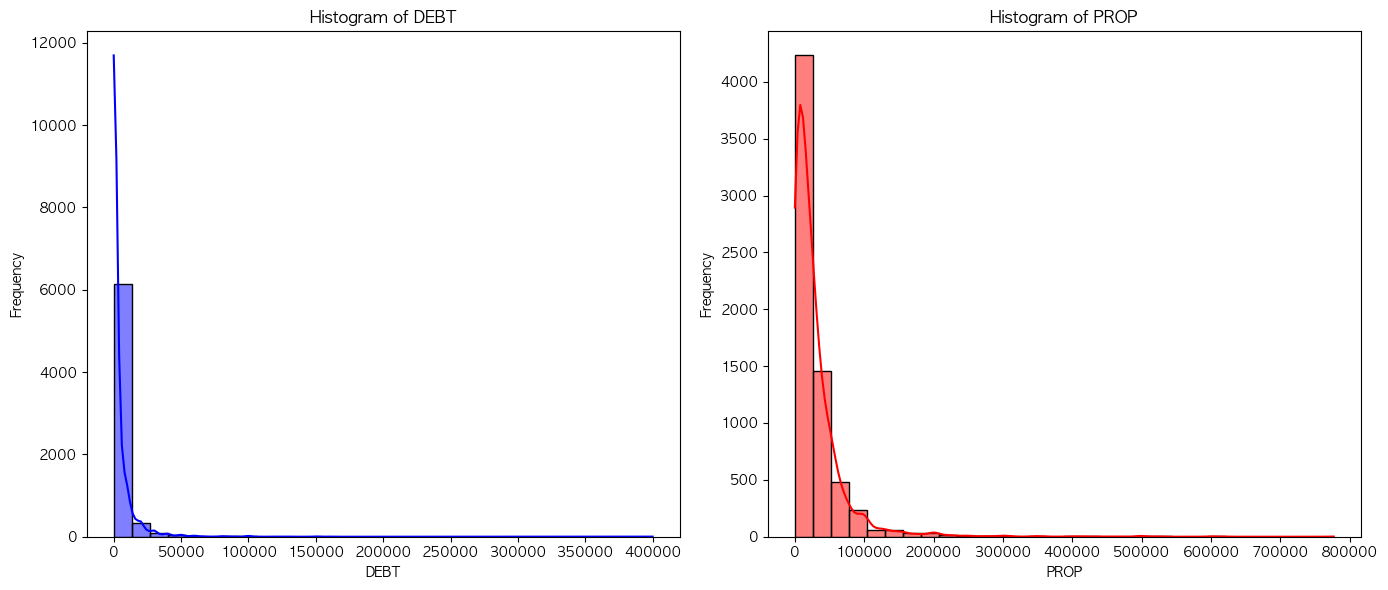

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# DEBT 히스토그램
sns.histplot(a, bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Histogram of DEBT")
axes[0].set_xlabel("DEBT")
axes[0].set_ylabel("Frequency")

# PROP 히스토그램
sns.histplot(b, bins=30, kde=True, color='red', ax=axes[1])
axes[1].set_title("Histogram of PROP")
axes[1].set_xlabel("PROP")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### 결측치 채우기
DEBT -> 데이터가 오른쪽으로 긴 꼬리를 가진 분포. 중앙값과 평균이 모두 0, 0으로 채우면 절반 이상의 값이 0이라서 데이터의 패턴을 유지하는 데는 좋겠지만 모든 결측치가 0이 되면 의미 있는 정보가 사라질 가능성이 있음. 75% 분위수를 사용하는 것보다 IQR 기반 보정된 값으로 결측치를 채우는 것이 더 의미있다고 판단. (현재 분포가 오른쪽으로 길게 늘어져있기 때문에 75% 분위수가 너무 높은 값으로 측정되어있을 것이라고 판단함)

`DEBT 결측치는 IQR 기반 보정된 값으로 채우는 것으로 결정`

$IQR = Q3 - Q1$

$IQR 기반 보정된 값 = Q1 + 0.5 * IQR$

PROP -> 데이터가 오른쪽으로 긴 꼬리를 가진 분포. 평균은 이상치로 인해 많이 높아졌기 때문에 평균보다는 중앙값으로 결측치를 처리하는 것이 좋을 것 같음

`PROP 결측치는 중앙값으로 채우는 것으로 결정`

In [300]:
Q1 = a.quantile(0.25)
Q3 = a.quantile(0.75)

In [301]:
a_IQR = Q1 + 0.5 * (Q3 - Q1)

In [302]:
b_median = b.quantile(0.50)

In [303]:
a_hh_df['DEBT'] = a_hh_df['DEBT'].replace(-9.0, a_IQR)

In [304]:
a_hh_df['PROP'] = a_hh_df['PROP'].replace(-9.0, b_median)

In [305]:
a_hh_df.loc[a_hh_df['DEBT'] == -9.0]

,DATE_Y,DATE_M,DATE_D,REGION1,REGION2,FAM_N,IND_N,DEATH_YN,ALL_CON,GENERTN,MARR_IMMI_YN,CUSTM_BENF_YN,CUSTM_BENF1_D,CUSTM_BENF2_D,CUSTM_BENF3_D,CUSTM_BENF4_D,HOUSE_TY,HOUSE_FLR,H_INC1,H_INC2,H_INC3,H_INC4,H_INC4_1_YN,H_INC4_2_YN,H_INC4_3_YN,H_INC4_4_YN,H_INC4_5_YN,H_INC4_6_YN,H_INC4_7_YN,H_INC4_8_YN,H_INC4_9_YN,H_INC4_10_YN,H_INC4_11_YN,H_INC5,H_INC5_1_YN,H_INC5_2_YN,H_INC6,H_INC6_1_YN,H_INC6_2_YN,H_INC7,H_INC_TOT,H_INC_MON,DEBT,PROP,LIV_EXP,LIV_EXP1,LIV_EXP2,NLIV_EXP,OTC_MED,OTC_BUY1,OTC_BUY2,OTC_BUY3,ORI_MED,HLT_SUP1,HLT_SUP2,HLT_SUP_BUY1,HLT_SUP_BUY2,HLT_SUP_BUY3,VIS_SUP,AUD_SUP,MED_SUP,H_OOP,HEXP1,HEXP2,HEXP3,H_PHI_N,H_FFS_YN
HHID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [306]:
a_hh_df.loc[a_hh_df['PROP'] == -9.0]

,DATE_Y,DATE_M,DATE_D,REGION1,REGION2,FAM_N,IND_N,DEATH_YN,ALL_CON,GENERTN,MARR_IMMI_YN,CUSTM_BENF_YN,CUSTM_BENF1_D,CUSTM_BENF2_D,CUSTM_BENF3_D,CUSTM_BENF4_D,HOUSE_TY,HOUSE_FLR,H_INC1,H_INC2,H_INC3,H_INC4,H_INC4_1_YN,H_INC4_2_YN,H_INC4_3_YN,H_INC4_4_YN,H_INC4_5_YN,H_INC4_6_YN,H_INC4_7_YN,H_INC4_8_YN,H_INC4_9_YN,H_INC4_10_YN,H_INC4_11_YN,H_INC5,H_INC5_1_YN,H_INC5_2_YN,H_INC6,H_INC6_1_YN,H_INC6_2_YN,H_INC7,H_INC_TOT,H_INC_MON,DEBT,PROP,LIV_EXP,LIV_EXP1,LIV_EXP2,NLIV_EXP,OTC_MED,OTC_BUY1,OTC_BUY2,OTC_BUY3,ORI_MED,HLT_SUP1,HLT_SUP2,HLT_SUP_BUY1,HLT_SUP_BUY2,HLT_SUP_BUY3,VIS_SUP,AUD_SUP,MED_SUP,H_OOP,HEXP1,HEXP2,HEXP3,H_PHI_N,H_FFS_YN
HHID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


# OTC_MED 결측치 처리 
**OTC_BUY1, OTC_BUY2, OTC_BUY3**

OTC_BUY1과 OTC_BUY2의 결측치는 0.0(구매하지 않음)으로 처리

-> OTC_BUY1과 OTC_BUY2는 OTC_MED가 0인 구매하지 않은 사람이기 때문

OTC_BUY3는 OTC_MED가 0이거나 구매처가 1순위만 있는 경우의 사람이 섞여 있기 때문에 인덱스에 저장된 사람의 경우 0.0으로 결측치를 처리하고 그 외의 모든 사람들은 구매처가 1순위만 있는 사람들이기 때문에 6.0으로 결측치를 처리한다.

이후 OTC_BUY1~3을 가중치 평균을 구한다.

OTC_BUY의 모든 값이 0.0인 사람은 가중치 평균에도 0.0으로 채운다.

가중치
- 1순위 : 3
- 2순위 : 2
- 3순위 : 1

OTC_BUY1, OTC_BUY2, OTC_BUY3를 없애고 `OTC_MED_LIKE_AVG`컬럼 새로만들기

DROP `OTC_BUY1`, `OTC_BUY2`, `OTC_BUY3`

`OTC_MED_LIKE_AVG` : 일반의약품 및 의약외품 구매처 선호도 가중치 평균

## a_hh_df

In [307]:
a_hh_df['OTC_BUY1'] = a_hh_df['OTC_BUY1'].fillna(0.0)

In [308]:
a_hh_df['OTC_BUY2'] = a_hh_df['OTC_BUY2'].fillna(0.0)

In [309]:
a_hh_df.loc[
    (a_hh_df['OTC_BUY3'].isnull()) &
    (a_hh_df['OTC_BUY1'] == 0.0) &
    (a_hh_df['OTC_BUY2'] == 0.0),
    'OTC_BUY3'
] = 0.0 

In [310]:
a_hh_df['OTC_BUY3'] = a_hh_df['OTC_BUY3'].fillna(6.0)

In [311]:
a_filtered_df = a_hh_df[a_hh_df['OTC_BUY1'] != 0.0]
a_weighted_avg = (a_filtered_df['OTC_BUY1'] * 3 + a_filtered_df['OTC_BUY2'] * 2 + a_filtered_df['OTC_BUY3'] * 2) / 6
a_hh_df['OTC_MED_LIKE_AVG'] = a_weighted_avg
a_hh_df['OTC_MED_LIKE_AVG'].value_counts()

OTC_MED_LIKE_AVG
4.5    3628
3.5    1122
3.8     736
4.3     200
2.8     152
3.3     115
5.5     114
3.2     114
6.0      54
4.2      29
5.0      23
4.8      22
4.0       9
6.5       7
2.5       6
2.2       4
3.0       4
5.2       2
2.3       1
2.7       1
Name: count, dtype: int64

In [312]:
a_hh_df = a_hh_df.drop(columns=['OTC_BUY1', 'OTC_BUY2', 'OTC_BUY3'])

## b_hh_df

In [313]:
b_hh_df['OTC_BUY1'] = b_hh_df['OTC_BUY1'].fillna(0.0)

In [314]:
b_hh_df['OTC_BUY2'] = b_hh_df['OTC_BUY2'].fillna(0.0)

In [315]:
b_hh_df.loc[
    (b_hh_df['OTC_BUY3'].isnull()) &
    (b_hh_df['OTC_BUY1'] == 0.0) &
    (b_hh_df['OTC_BUY2'] == 0.0),
    'OTC_BUY3'
] = 0.0 

In [316]:
b_hh_df['OTC_BUY3'] = b_hh_df['OTC_BUY3'].fillna(6.0)

In [317]:
b_filtered_df = b_hh_df[b_hh_df['OTC_BUY1'] != 0.0]
b_weighted_avg = (b_filtered_df['OTC_BUY1'] * 3 + b_filtered_df['OTC_BUY2'] * 2 + b_filtered_df['OTC_BUY3'] * 2) / 6
b_hh_df['OTC_MED_LIKE_AVG'] = b_weighted_avg
b_hh_df['OTC_MED_LIKE_AVG'].value_counts()

OTC_MED_LIKE_AVG
4.5    2886
3.5     998
3.8     761
4.3     559
3.3     313
2.8     286
6.0      91
3.2      81
5.0      40
5.5      39
4.2      36
4.8      23
4.0       8
6.5       5
2.5       5
5.7       3
2.2       3
4.7       2
2.3       2
5.8       2
3.0       1
Name: count, dtype: int64

In [318]:
b_hh_df = b_hh_df.drop(columns=['OTC_BUY1', 'OTC_BUY2', 'OTC_BUY3'])

## c_hh_df

In [319]:
c_hh_df['OTC_BUY1'] = c_hh_df['OTC_BUY1'].fillna(0.0)

In [320]:
c_hh_df['OTC_BUY2'] = c_hh_df['OTC_BUY2'].fillna(0.0)

In [321]:
c_hh_df.loc[
    (c_hh_df['OTC_BUY3'].isnull()) &
    (c_hh_df['OTC_BUY1'] == 0.0) &
    (c_hh_df['OTC_BUY2'] == 0.0),
    'OTC_BUY3'
] = 0.0 

In [322]:
c_hh_df['OTC_BUY3'] = c_hh_df['OTC_BUY3'].fillna(6.0)

In [323]:
c_filtered_df = c_hh_df[c_hh_df['OTC_BUY1'] != 0.0]
c_weighted_avg = (c_filtered_df['OTC_BUY1'] * 3 + c_filtered_df['OTC_BUY2'] * 2 + c_filtered_df['OTC_BUY3'] * 2) / 6
c_hh_df['OTC_MED_LIKE_AVG'] = c_weighted_avg
c_hh_df['OTC_MED_LIKE_AVG'].value_counts()

OTC_MED_LIKE_AVG
4.5    2733
3.5     872
3.8     688
4.3     590
3.3     408
2.8     232
6.0      88
3.2      76
5.0      45
5.5      39
4.2      22
4.8      14
3.0       9
4.0       6
2.5       2
5.7       1
2.7       1
2.2       1
4.7       1
6.5       1
Name: count, dtype: int64

In [324]:
c_hh_df = c_hh_df.drop(columns=['OTC_BUY1', 'OTC_BUY2', 'OTC_BUY3'])

# HLT_SUP1, HLT_SUP2

OTC_MED와 OTC_BUY1~3과 같은 방식으로 처리

DROP `HLT_SUP_BUY1`, `HLT_SUP_BUY2`, `HLT_SUP_BUY3`

`HLT_SUP_LIKE_AVG` : 건강보조식품 구매처 선호 가중치 평균

## a_hh_df

In [325]:
a_hh_df['HLT_SUP_BUY1'] = a_hh_df['HLT_SUP_BUY1'].fillna(0.0)

In [326]:
a_hh_df['HLT_SUP_BUY2'] = a_hh_df['HLT_SUP_BUY2'].fillna(0.0)

In [327]:
a_hh_df.loc[
    (a_hh_df['HLT_SUP_BUY3'].isnull()) &
    (a_hh_df['HLT_SUP_BUY1'] == 0.0) &
    (a_hh_df['HLT_SUP_BUY2'] == 0.0),
    'HLT_SUP_BUY3'
] = 0.0 

In [328]:
a_hh_df['HLT_SUP_BUY3'] = a_hh_df['HLT_SUP_BUY3'].fillna(6.0)

In [329]:
a_filtered_df = a_hh_df[a_hh_df['HLT_SUP_BUY1'] != 0.0]
a_weighted_avg = (a_filtered_df['HLT_SUP_BUY1'] * 3 + a_filtered_df['HLT_SUP_BUY2'] * 2 + a_filtered_df['HLT_SUP_BUY3'] * 2) / 6
a_hh_df['HLT_SUP_LIKE_AVG'] = a_weighted_avg
a_hh_df['HLT_SUP_LIKE_AVG'].value_counts()

HLT_SUP_LIKE_AVG
6.0    1205
4.5     733
5.5     409
3.8     244
4.3     236
5.0     182
6.5     146
4.8     133
3.5     104
5.7      52
3.3      48
2.8      31
5.8      26
3.2      25
5.2      16
4.0      12
4.2      10
4.7       8
3.0       3
2.5       1
Name: count, dtype: int64

In [330]:
a_hh_df = a_hh_df.drop(columns=['HLT_SUP_BUY1', 'HLT_SUP_BUY2', 'HLT_SUP_BUY3'])

## b_hh_df

In [331]:
b_hh_df['HLT_SUP_BUY1'] = b_hh_df['HLT_SUP_BUY1'].fillna(0.0)

In [332]:
b_hh_df['HLT_SUP_BUY2'] = b_hh_df['HLT_SUP_BUY2'].fillna(0.0)

In [333]:
b_hh_df.loc[
    (b_hh_df['HLT_SUP_BUY3'].isnull()) &
    (b_hh_df['HLT_SUP_BUY1'] == 0.0) &
    (b_hh_df['HLT_SUP_BUY2'] == 0.0),
    'HLT_SUP_BUY3'
] = 0.0 

In [334]:
b_hh_df['HLT_SUP_BUY3'] = b_hh_df['HLT_SUP_BUY3'].fillna(6.0)

In [335]:
b_filtered_df = b_hh_df[b_hh_df['HLT_SUP_BUY1'] != 0.0]
b_weighted_avg = (b_filtered_df['HLT_SUP_BUY1'] * 3 + b_filtered_df['HLT_SUP_BUY2'] * 2 + b_filtered_df['HLT_SUP_BUY3'] * 2) / 6
b_hh_df['HLT_SUP_LIKE_AVG'] = b_weighted_avg
b_hh_df['HLT_SUP_LIKE_AVG'].value_counts()

HLT_SUP_LIKE_AVG
6.0    1205
4.5     776
4.3     334
5.5     286
3.8     221
5.0     179
4.8     123
6.5      98
3.5      96
3.3      73
5.7      54
2.8      25
3.2      25
4.2      24
5.8      15
4.0      12
4.7       7
5.2       1
2.7       1
3.0       1
Name: count, dtype: int64

In [336]:
b_hh_df = b_hh_df.drop(columns=['HLT_SUP_BUY1', 'HLT_SUP_BUY2', 'HLT_SUP_BUY3'])

## c_hh_df

In [337]:
c_hh_df['HLT_SUP_BUY1'] = c_hh_df['HLT_SUP_BUY1'].fillna(0.0)

In [338]:
c_hh_df['HLT_SUP_BUY2'] = c_hh_df['HLT_SUP_BUY2'].fillna(0.0)

In [339]:
c_hh_df.loc[
    (c_hh_df['HLT_SUP_BUY3'].isnull()) &
    (c_hh_df['HLT_SUP_BUY1'] == 0.0) &
    (c_hh_df['HLT_SUP_BUY2'] == 0.0),
    'HLT_SUP_BUY3'
] = 0.0 

In [340]:
c_hh_df['HLT_SUP_BUY3'] = c_hh_df['HLT_SUP_BUY3'].fillna(6.0)

In [341]:
c_filtered_df = c_hh_df[c_hh_df['HLT_SUP_BUY1'] != 0.0]
c_weighted_avg = (c_filtered_df['HLT_SUP_BUY1'] * 3 + c_filtered_df['HLT_SUP_BUY2'] * 2 + c_filtered_df['HLT_SUP_BUY3'] * 2) / 6
c_hh_df['HLT_SUP_LIKE_AVG'] = c_weighted_avg
c_hh_df['HLT_SUP_LIKE_AVG'].value_counts()

HLT_SUP_LIKE_AVG
6.0    1239
4.5     812
4.3     434
3.8     237
5.5     222
5.0     199
6.5     105
3.5      99
4.8      86
3.3      55
5.7      42
4.2      25
5.8      22
2.8      20
3.2      19
4.7      13
4.0      11
5.2       8
2.5       2
3.7       2
Name: count, dtype: int64

In [342]:
c_hh_df = c_hh_df.drop(columns=['HLT_SUP_BUY1', 'HLT_SUP_BUY2', 'HLT_SUP_BUY3'])

In [343]:
a_hh_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6689 entries, 112001011.0 to 400009011.0
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE_Y            6689 non-null   float64
 1   DATE_M            6689 non-null   float64
 2   DATE_D            6689 non-null   float64
 3   REGION1           6689 non-null   float64
 4   REGION2           6689 non-null   float64
 5   FAM_N             6689 non-null   float64
 6   IND_N             6689 non-null   float64
 7   DEATH_YN          6689 non-null   float64
 8   ALL_CON           6689 non-null   float64
 9   GENERTN           6689 non-null   float64
 10  MARR_IMMI_YN      6689 non-null   float64
 11  CUSTM_BENF_YN     6689 non-null   float64
 12  CUSTM_BENF1_D     6689 non-null   float64
 13  CUSTM_BENF2_D     6689 non-null   float64
 14  CUSTM_BENF3_D     6689 non-null   float64
 15  CUSTM_BENF4_D     6689 non-null   float64
 16  HOUSE_TY          6689 non-nul

# MED_SUP 결측치 처리
결측치가 2개 밖에 없으므로 결측치는 0.0으로 처리

In [344]:
a_hh_df['MED_SUP'] = a_hh_df['MED_SUP'].fillna(0.0)
b_hh_df['MED_SUP'] = b_hh_df['MED_SUP'].fillna(0.0)
c_hh_df['MED_SUP'] = c_hh_df['MED_SUP'].fillna(0.0)

# H_OOP 결측치 처리
의료서비스(응급,입원,외래)를 이용하지 않은 사람들이 결측치로 있기 때문에 이용하지 않으면 비용이 0원이므로 0.0으로 결측치 처리함

In [345]:
a_hh_df['H_OOP'] = a_hh_df['H_OOP'].fillna(0.0)
b_hh_df['H_OOP'] = b_hh_df['H_OOP'].fillna(0.0)
c_hh_df['H_OOP'] = c_hh_df['H_OOP'].fillna(0.0)

# HEXP2 결측치 처리
의료비 지원 여부를 모르는 결측치는 0.0 으로 처리

In [363]:
a_hh_df['HEXP2'] = a_hh_df['HEXP2'].replace(-9.0, 0.0)
b_hh_df['HEXP2'] = b_hh_df['HEXP2'].replace(-9.0, 0.0)
c_hh_df['HEXP2'] = c_hh_df['HEXP2'].replace(-9.0, 0.0)

# HEXP3 결측치 처리
의료비 지원을 받지 않은 사람들이 결측치로 들어가 있어서 결측치를 0.0으로 처리

In [364]:
a_hh_df['HEXP3'] = a_hh_df['HEXP3'].fillna(0.0)
b_hh_df['HEXP3'] = b_hh_df['HEXP3'].fillna(0.0)
c_hh_df['HEXP3'] = c_hh_df['HEXP3'].fillna(0.0)

# H_PHI_N
결측치에는 민간의료보험을 가입하지 않거나 응답하지 않은 사람들이 있는데 그냥 보험을 들지 않은 사람들로 간주
결측치는 0.0으로 처리

In [365]:
a_hh_df['H_PHI_N'] = a_hh_df['H_PHI_N'].fillna(0.0)
b_hh_df['H_PHI_N'] = b_hh_df['H_PHI_N'].fillna(0.0)
c_hh_df['H_PHI_N'] = c_hh_df['H_PHI_N'].fillna(0.0)

# H_FFS_YN
결측치를 어떻게 해야할까..

# 시각화할 때 한국어 지원

In [366]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

pd.set_option('display.float_format',  '{:.1f}'.format)
pd.set_option('display.max_columns', None)

plt.rcParams['font.family'] = "AppleGothic"

# 보험 가입 개수에 따른 연간 전체 의료비 지출 비용의 변화
보험 가입 개수가 적을수록 의료비 지출의 폭이 더 넓어지는 경향이 있음

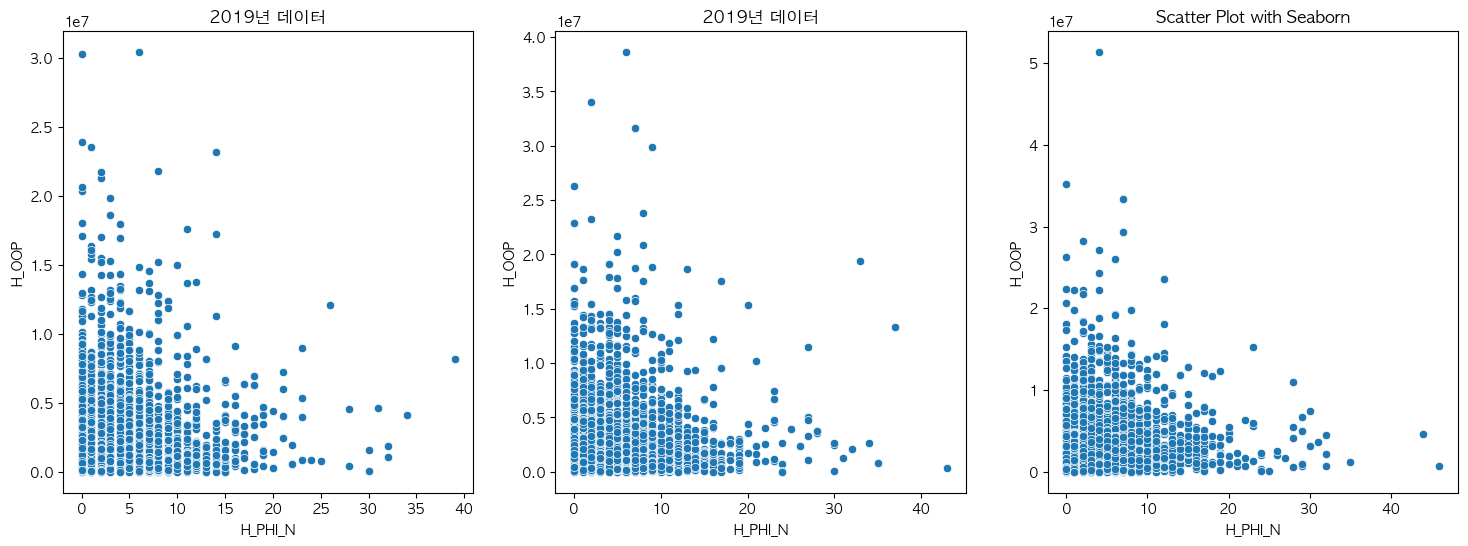

In [367]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=a_hh_df['H_PHI_N'], y=a_hh_df['H_OOP'], palette='Set1', ax=axes[0])
axes[0].set_title("2019년 데이터")

sns.scatterplot(x=b_hh_df['H_PHI_N'], y=b_hh_df['H_OOP'], palette='Set1', ax=axes[1])
axes[1].set_title("2019년 데이터")

sns.scatterplot(x=c_hh_df['H_PHI_N'], y=c_hh_df['H_OOP'], palette='Set1', ax=axes[2])
axes[2].set_title("2019년 데이터")

plt.title("Scatter Plot with Seaborn")
plt.show()

# 의료 지원 여부 따른 연간 의료비 지출 비교
의료비 지원을 받는 사람들의 의료비 지출비용 평균이 더 높은 것으로 보인다.

-> 의료비 지원을 받는 사람들의 특성 때문이 아닐까..

일반적으로 의료비 지원을 받는 대상자들은 고령층, 만성질환자 등이 많을 가능성이 있는데 이들은 일반 사람들보다 더 많은 의료 서비스를 이용하기 때문일 것이라고 추측

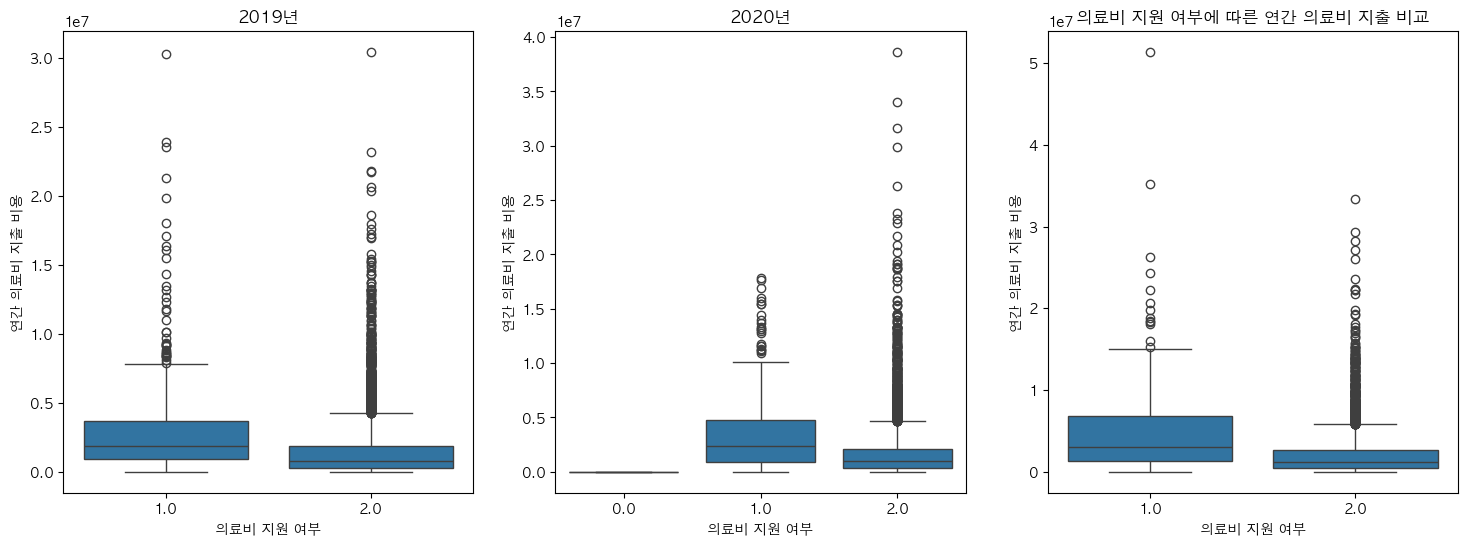

In [368]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='HEXP2', y='H_OOP', data=a_hh_df, ax=axes[0])
axes[0].set_title("2019년")
axes[0].set_xlabel("의료비 지원 여부")
axes[0].set_ylabel("연간 의료비 지출 비용")

sns.boxplot(x='HEXP2', y='H_OOP', data=b_hh_df, ax=axes[1])
axes[1].set_title("2020년")
axes[1].set_xlabel("의료비 지원 여부")
axes[1].set_ylabel("연간 의료비 지출 비용")

sns.boxplot(x='HEXP2', y='H_OOP', data=c_hh_df, ax=axes[2])
axes[2].set_title("2021년")
axes[2].set_xlabel("의료비 지원 여부")
axes[2].set_ylabel("연간 의료비 지출 비용")

plt.title("의료비 지원 여부에 따른 연간 의료비 지출 비교")
plt.show()

# 지출과 부채 및 자산 사이의 상관관계
- 소비지출이 크면 식료품비와 외식비도 당연히 커진다
- 소비지출이 커질수록 비소비지출도 커지는 경향이 있다

In [369]:
select_col = ['DEBT', 'PROP', 'LIV_EXP', 'LIV_EXP1', 'LIV_EXP2', 'NLIV_EXP']
a_corr_matrix = a_hh_df[select_col].corr()
b_corr_matrix = b_hh_df[select_col].corr()
c_corr_matrix = c_hh_df[select_col].corr()

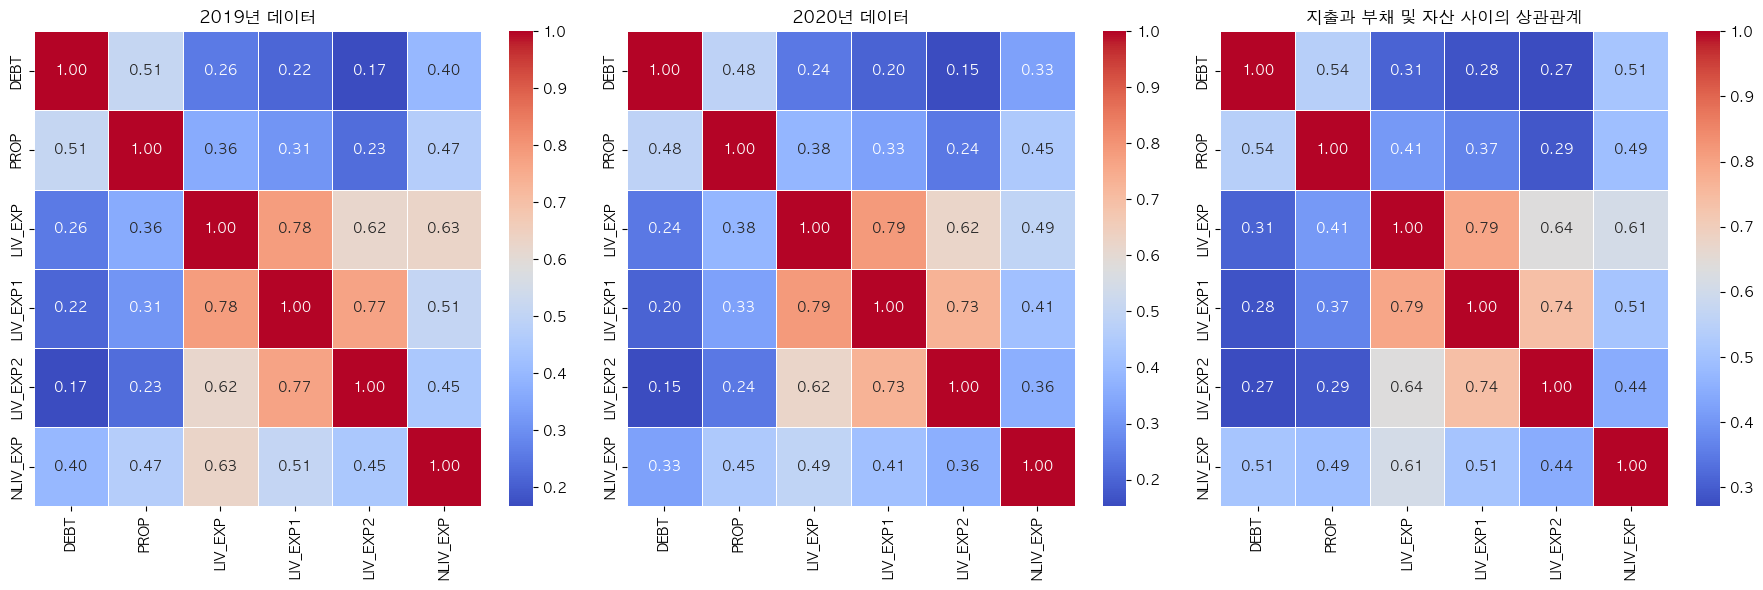

In [370]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 가로 3개 배치

# 첫 번째 히트맵
sns.heatmap(a_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("2019년 데이터")

# 두 번째 히트맵
sns.heatmap(b_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("2020년 데이터")

# 세 번째 히트맵
sns.heatmap(c_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[2])
axes[2].set_title("2021년 데이터")

# 그래프 간격 조정
plt.tight_layout()
plt.title("지출과 부채 및 자산 사이의 상관관계")
plt.show()